![Py4Eng](img/logo.png)

# Machine learning
## Yoav Ram

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(
    style='white',
    context='talk'
)

# Machine learning with *scikit-learn*

[![scikit-learn logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)](http://scikit-learn.org/)

*scikit-learn* is a Python package for machine learning:


- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

We will do [one of the many tutorials](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) from the *scikit-learn* website. 

You can install *scikit-learn* with `conda install scikit-learn`.

## Supervised learning: predicting an output variable from high-dimensional observations

Supervised learning consists in learning the link between two datasets: the observed data `X` and an external variable `y` that we are trying to predict, usually called “target” or “labels”. Most often, `y` is a 1D array of length `n_samples`.

All supervised estimators in *scikit-learn* implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

## Iris dataset

[Fisher's Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width.

![RA Fisher](https://upload.wikimedia.org/wikipedia/commons/4/46/R._A._Fischer.jpg)

![Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg)

Let's start by loading the dataset.

In [2]:
import sklearn.datasets
import sklearn.neighbors as nb

In [117]:
iris = sklearn.datasets.load_iris()
print("Features:", iris.feature_names)
print("Types:", iris.target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Types: ['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## k-Nearest neighbors classifier (KNN)

The simplest possible classifier is the nearest neighbor: given a new observation `X_test`, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector.

**Training set and testing set.** 
While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.

Split the dataset to train and test data using a random permutation - this is easily done with functions from the `model_selection` module, which has many methods to split datasets. We'll use a very simple one, `train_test_split` which just splits that data by sampling a fraction of the rows to the training set and the rest to the test set (without replacement).

In [118]:
from sklearn.model_selection import train_test_split

In [123]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [142]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66, random_state=0)

Import the nearest-neighbor classifier, then create and fit it:

In [136]:
knn = nb.KNeighborsClassifier()
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Predict the labels (Iris species) for the test data and compare with the real labels:

In [137]:
y_hat = knn.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', (y_hat == y_test).mean())

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 1 2 0 0 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2]
Accuracy: 0.9090909090909091


# Reduce dimensions

To reduce the dimensionality of the problem (4 features - 4D) we can use *Seaborn*'s `PairGrid` plot to look for features that are well correlated:

/Users/yoavram/miniconda3/envs/DataSciPy/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


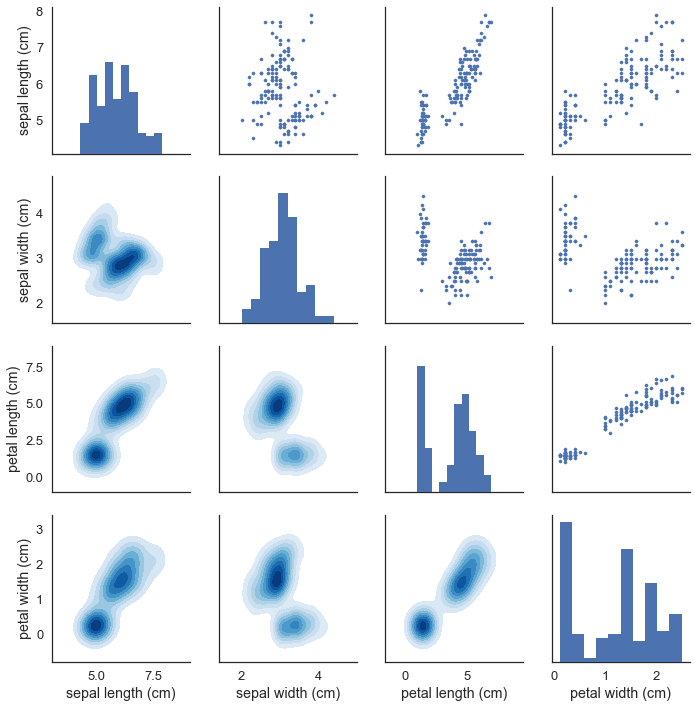

In [20]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=10)
g.map_lower(sns.kdeplot, cmap='Blues', legend=False, shade=True, shade_lowest=False)
g.map_diag(plt.hist);

We can also look at the correlation matrix:

In [22]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


Seems that the least correlated features are **sepal width** and **sepal length**.

Let's work just with the sepal then - the first two colums.

Split to training and testing:

In [143]:
X_train = X_train[:,2:]
X_test = X_test[:,2:]

Fit and predict:

In [144]:
knn = nb.KNeighborsClassifier()
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', (y_hat == y_test).mean())

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 1 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2]
Accuracy: 0.9191919191919192


We didn't gained any accuracy, but that's expected as the test set size is just 50.
But we are in 2D we can plot the classifier fit:

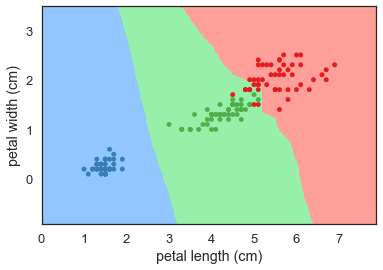

In [145]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
X = iris.data[:,2:]
y = iris.target

# Create color maps
cmap_light = ListedColormap(sorted(sns.color_palette('pastel', 3)))
cmap_bold = ListedColormap(sorted(sns.color_palette('Set1', 3)))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
ax.set(
    xlim=(xx.min(), xx.max()),
    ylim=(yy.min(), yy.max()),
    xlabel=iris.feature_names[2],
    ylabel=iris.feature_names[3]
);

# Recognizing handwritten digits 

Learning to recognize handwritten digits with a K-nearest neighbors classifier, inspired by [IPython Interactive Computing and Visualization Cookbook](http://ipython-books.github.io/).

Start by looking at the data. We'll use IPython's widgets to create a slider so we can move between the > 1500 digits images that are in scikit-learn's datasets package.

Note: if `interact` doesn't work (no slider appears) you should install: 
```sh
conda update ipywidgets
```

In [146]:
X, y = sklearn.datasets.load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [148]:
from ipywidgets import interact
@interact(idx=(0, X.shape[0] - 1))
def show_digit(idx):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(X[idx].reshape(8, 8), cmap='gray_r')
    ax.set(xticks=[], yticks=[])
    sns.despine(left=True, bottom=True)
    print(y[idx])

interactive(children=(IntSlider(value=898, description='idx', max=1796), Output()), _dom_classes=('widget-inte…

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.33)

In [164]:
knn = nb.KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9814814814814815

In [167]:
y_hat = knn.predict(X_test)
mask = y_hat != y_test
mask.sum()

11

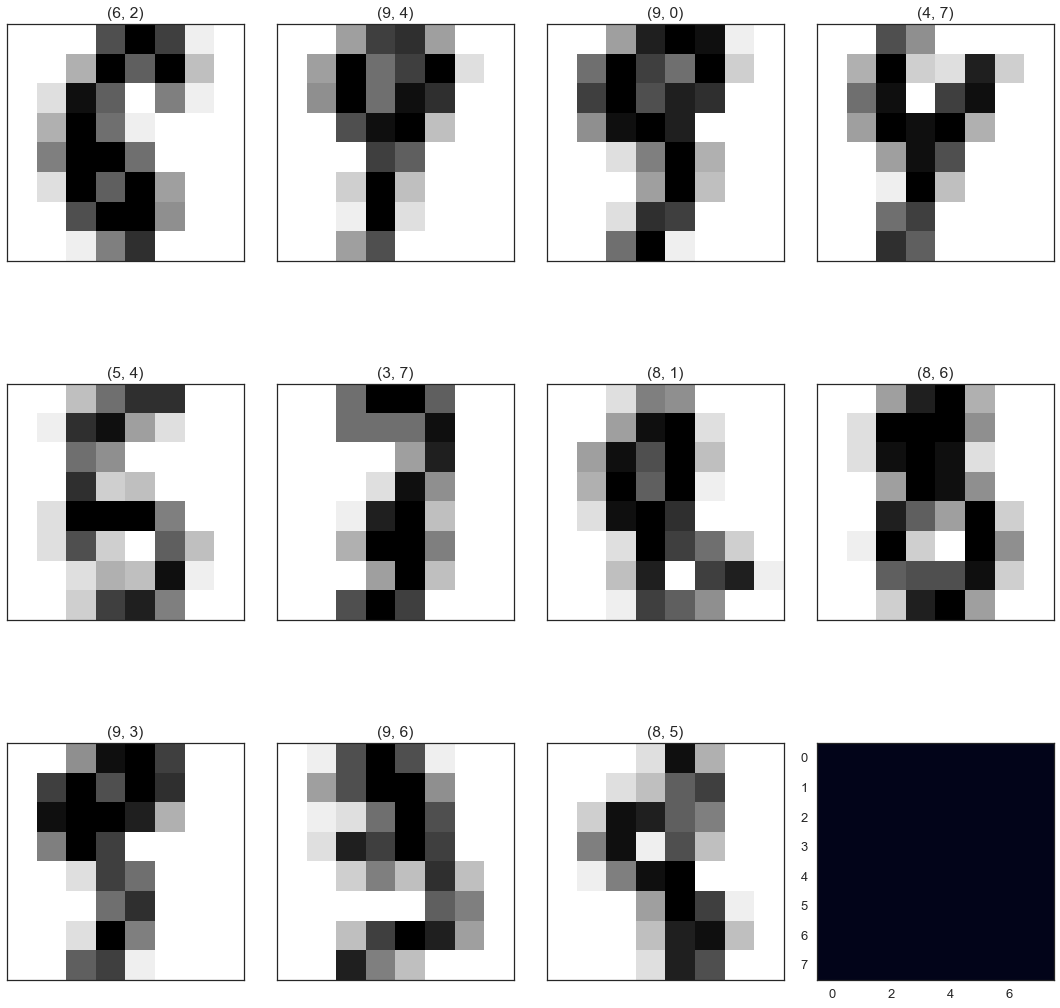

In [176]:
mistakes = X_test[mask]
truth = y_test[mask]
fig, axes = plt.subplots(3, 4, figsize=(15, 16))
for ax, im, label, y_hat_ in zip(axes.flat, mistakes, truth, y_hat):
    ax.imshow(im.reshape(8, 8), cmap='gray_r')
    ax.set(xticks=[], yticks=[], title=(label, y_hat_))
axes[-1,-1].imshow(np.zeros((8,8)))
fig.tight_layout()

Can we do any better with a different classifier?
Let's try the logistic regression classifer.
In this model, we try to estimate the probability $p_k$ that a data sample (image) belongs to class $k$ (digit $k$).

In [3]:
from sklearn import linear_model

In [178]:
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
logistic.score(X_test, y_test)

0.9545454545454546

How about a neural network?

In [4]:
from sklearn import neural_network

In [181]:
nn = neural_network.MLPClassifier(hidden_layer_sizes=(1000, 500))
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

0.9713804713804713

As you can see, the models all have the same API, which allows us to use them like this:

In [5]:
from sklearn import ensemble
from sklearn import svm

In [182]:
models = [
    nb.KNeighborsClassifier(), 
    linear_model.LogisticRegression(),
    neural_network.MLPClassifier(),
    neural_network.MLPClassifier(hidden_layer_sizes=(1000, 500)),
    neural_network.BernoulliRBM(),
    ensemble.RandomForestClassifier(n_estimators=10),
    ensemble.RandomForestClassifier(n_estimators=100),
    ensemble.RandomForestClassifier(n_estimators=1000),
    svm.SVC()
]

In [85]:
for model in models:
    model.fit(X_train, y_train)
    print(model)
    print(model.score(X_test, y_test))
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.9764309764309764

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9528619528619529

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
0.9595959595959596

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,

## Exercise - wine classification

The wine dataset contains 13 features and 3 target labels.
Apply one of the classifiers in scikit-learn to this dataset: fit the classifier and score it.

In [184]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [229]:
dataset = sklearn.datasets.load_wine()
print(dataset['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [230]:
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
model = ensemble.RandomForestClassifier(1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9550561797752809

# Regression

We'll work with the diabetes dataset:
> Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

In [198]:
diabetes = sklearn.datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

Let's look at the features (`X`):

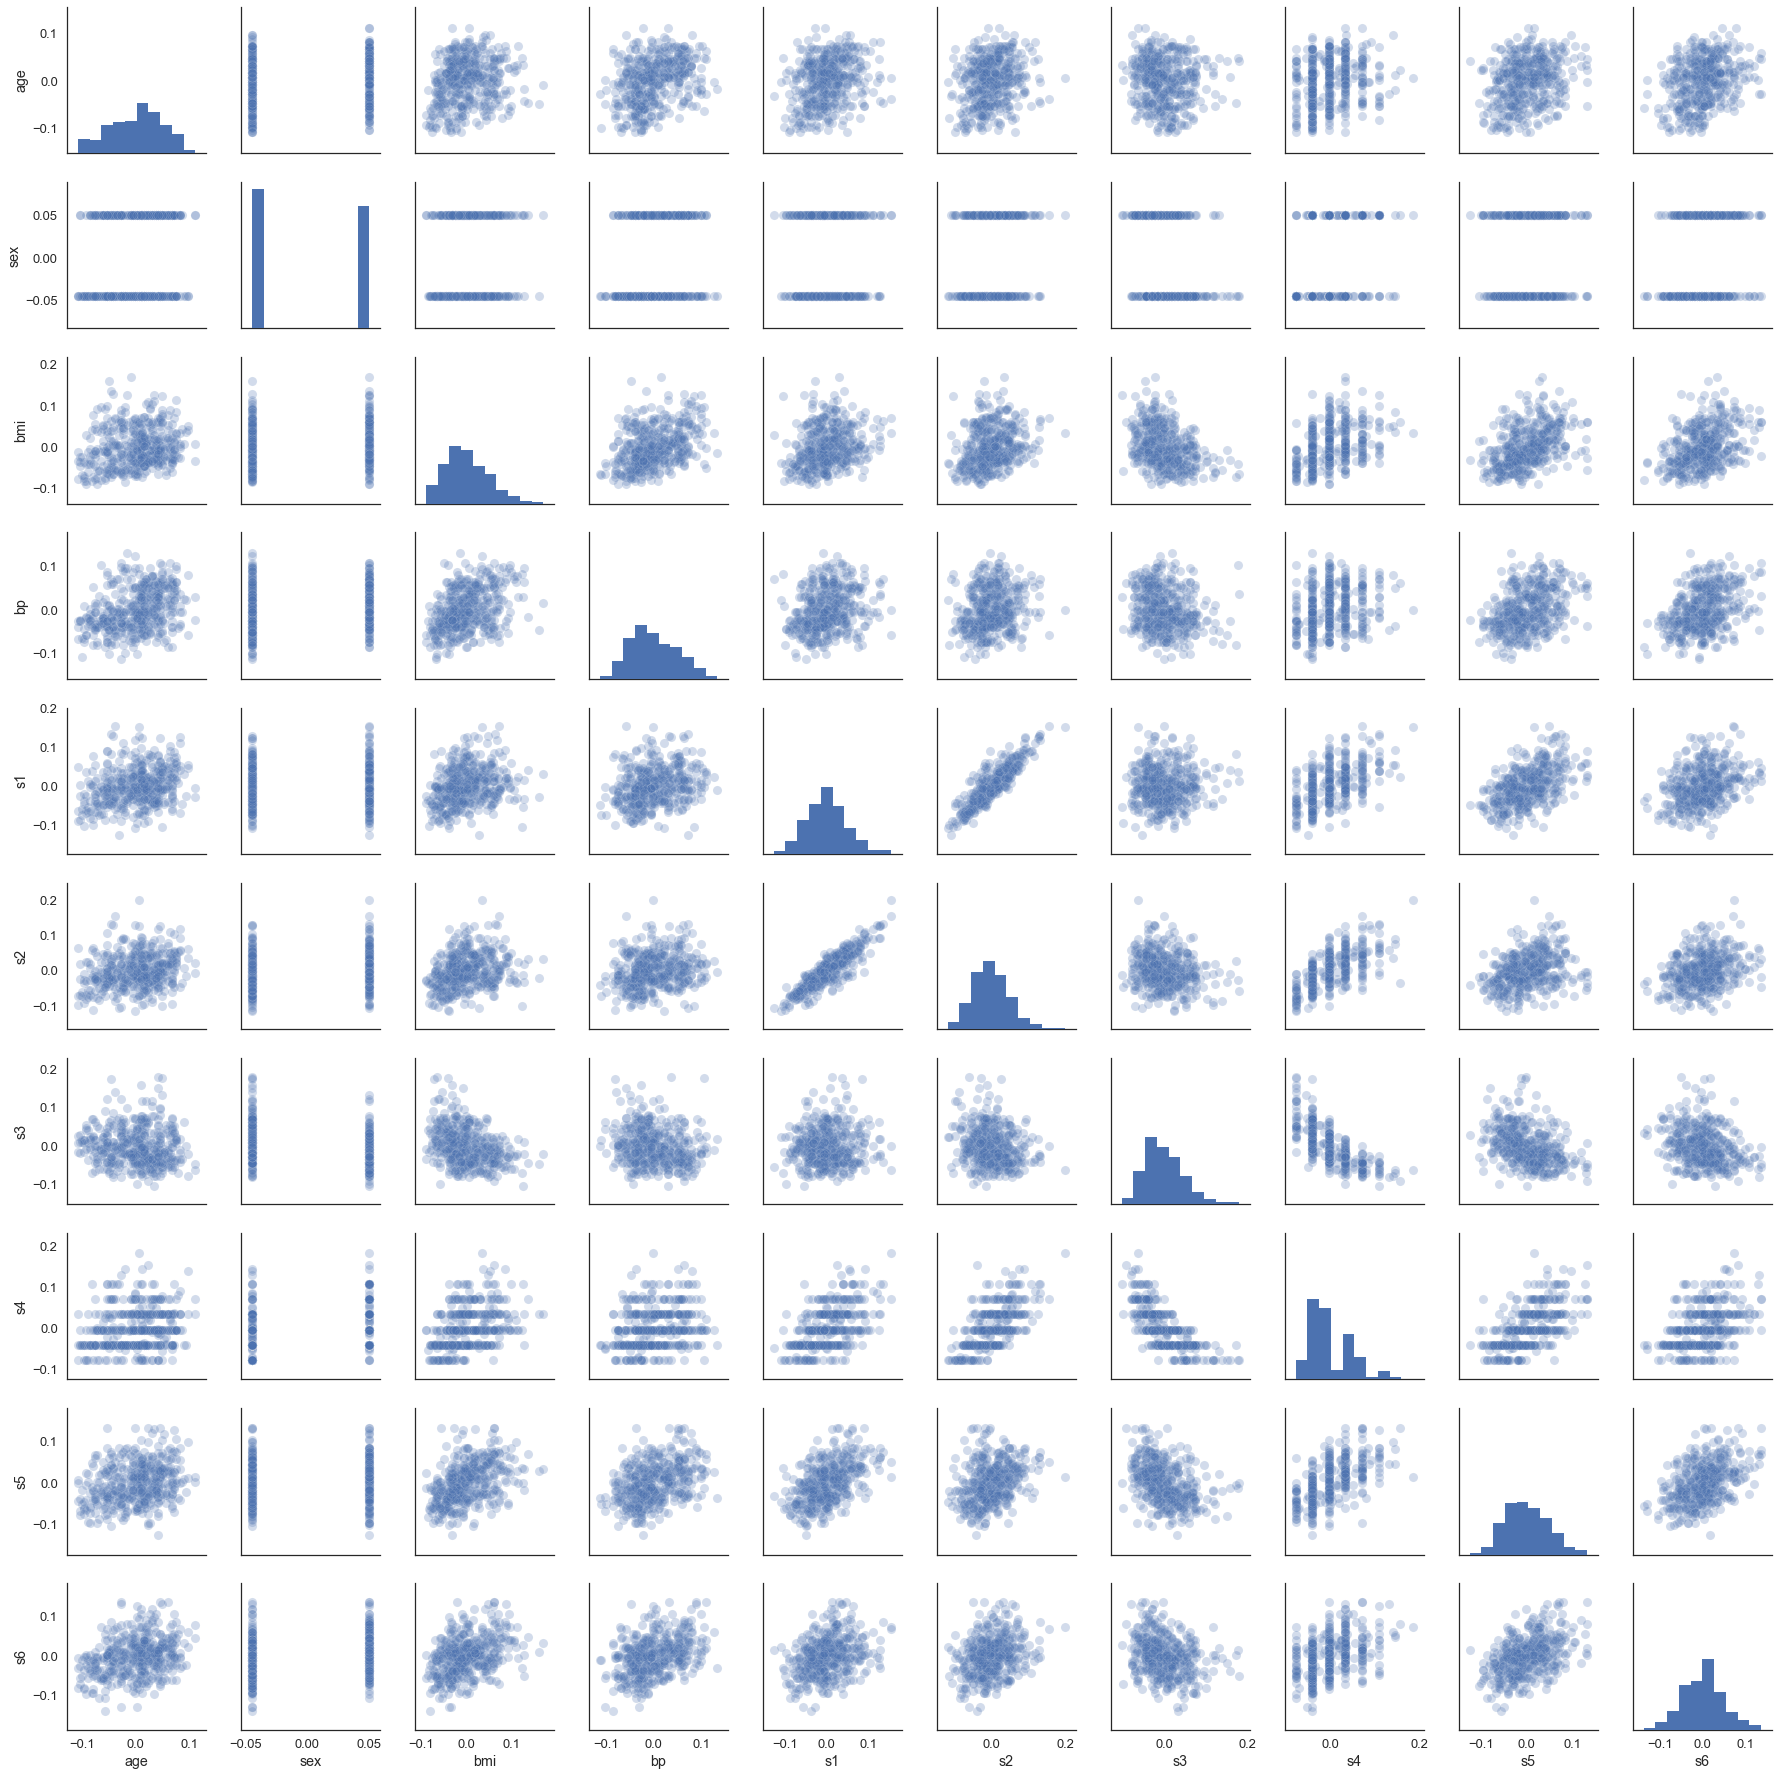

In [199]:
sns.pairplot(pd.DataFrame(data=X, columns=diabetes.feature_names), plot_kws=dict(alpha=0.25));

Let's look at the distribution of the targets (`y`):

/Users/yoavram/miniconda3/envs/Py4Eng/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


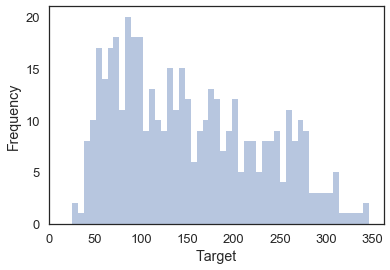

In [200]:
sns.distplot(y, kde=False, bins=50)
plt.xlim(0, None);
plt.xlabel('Target')
plt.ylabel('Frequency');

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Let's use a linear model to do regression. We'll use the Lasso model ([Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)=least absolute shrinkage and selection operator), which is a regression method that performs both feature selection (which of the columns to use for prediction) and regularization (avoiding giving too much weight to any single feature). 
Thus, it increases prediction accuracy as well as interpretability of the linear model.

This is done by minimizing not just the sum of residual squares between the model predictions and the observed values (the fit, $\sum_i{(\widehat{y}_i-y_i)^2)}$, but also the sum of the absolute values of the model coefficients (the penalty, $\sum_i{|a_i|}$).
A meta-parameter α is used to weight the penalty relative to the fit: the higher α, the more weight is given to the penalty.

Test score: 0.35689785577554045


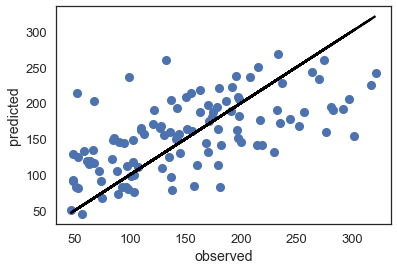

In [202]:
reg = linear_model.LassoCV()
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)
plt.plot(y_test, y_hat, 'o')
plt.plot(y_test, y_test, '--k')
plt.xlabel('observed')
plt.ylabel('predicted')
print('Test score:', reg.score(X_test, y_test))

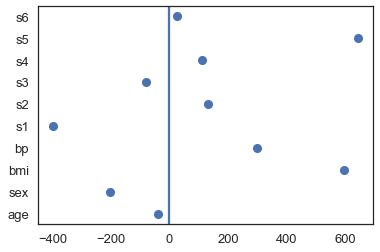

In [215]:
fig, ax = plt.subplots()
ax.plot(reg.coef_, range(len(reg.coef_)), 'o')
ax.axvline(0)
ax.set_yticks(range(len(diabetes.feature_names)))
ax.set_yticklabels(diabetes.feature_names);

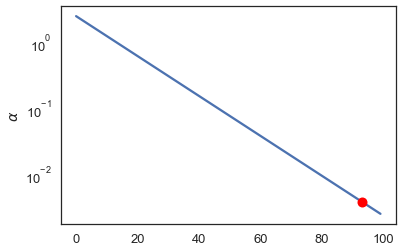

In [216]:
plt.plot(reg.alphas_)
idx = (reg.alphas_==reg.alpha_).argmax()
plt.plot([idx], [reg.alpha_], 'or', markersize=10)
plt.ylabel(r'$\alpha$')
plt.yscale('log')

# Feature selection

We want to see if we can remove any one feature without reducing our accuracy, or even improving it.

First, let's fit the full linear model:

In [91]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
print('Test score:', score)

Test score: 0.35940090989715534


So that's our baseline.

Now we'll create all combinations of 9 out of 10 features:

In [92]:
from itertools import combinations
columns = combinations(range(n_features), n_features-1)
columns = list(columns)
columns.reverse()
columns[0], columns[9]

((1, 2, 3, 4, 5, 6, 7, 8, 9), (0, 1, 2, 3, 4, 5, 6, 7, 8))

and calculate the score without each of the columns:

In [93]:
scores = np.empty(n_features)
for j in range(n_features):
    reg = linear_model.LinearRegression()
    reg.fit(X_train[:,columns[j]], y_train)
    scores[j] = reg.score(X_test[:,columns[j]], y_test)

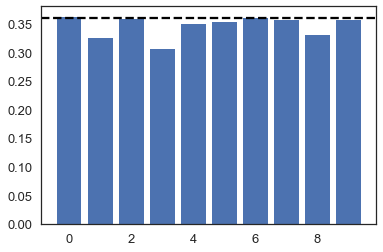

In [94]:
plt.bar(range(n_features), scores)
plt.axhline(score, ls='--', color='k');

So removing any feature decreases the score.
But it seems that removing feature 0 and 6 reduces it the least.

But maybe this is just a chance because of the train-test split?
To solve average these kind of chances, we due multiple splits and average scores on each split in a process called **cross validation**, and specifically, K-fold cross validation (where K stands for the number of splits we do).

In [99]:
from sklearn.model_selection import cross_val_score

In [110]:
full_scores = cross_val_score(linear_model.LinearRegression(), X, y, cv=5)

scores = np.array([
    cross_val_score(linear_model.LinearRegression(), X[:,columns[j]], y, cv=5)
    for j in range(n_features)
])
scores

array([[0.43068572, 0.52638191, 0.48332457, 0.44001828, 0.55016985],
       [0.38808264, 0.50227399, 0.5019697 , 0.38811607, 0.53892669],
       [0.38286586, 0.4490163 , 0.3604109 , 0.40168017, 0.46752793],
       [0.39450529, 0.51365377, 0.49391652, 0.36269157, 0.51114229],
       [0.41990906, 0.51544171, 0.49039641, 0.42208841, 0.54169082],
       [0.42659284, 0.51826512, 0.49127087, 0.42069286, 0.54490232],
       [0.42859765, 0.52188552, 0.48475653, 0.43065789, 0.54967722],
       [0.42492404, 0.52036232, 0.48225691, 0.43149083, 0.54871126],
       [0.3770245 , 0.50153209, 0.49102695, 0.40834857, 0.5151616 ],
       [0.4409735 , 0.5248217 , 0.47986219, 0.44452649, 0.55229566]])

In [112]:
df = pd.DataFrame(data=scores.ravel(), columns=['score'])
df['feature'] = np.repeat(range(n_features), 5)
df.head()

,score,feature
0,0.430686,0
1,0.526382,0
2,0.483325,0
3,0.440018,0
4,0.550170,0


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


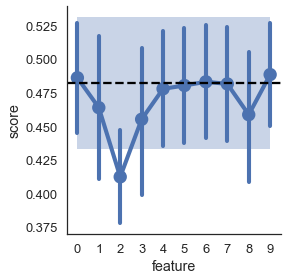

In [123]:
sns.factorplot('feature', 'score', data=df)
plt.fill_between(
    x=range(n_features), 
    y1=full_scores.mean()-full_scores.std(), 
    y2=full_scores.mean()+full_scores.std(),
    alpha=0.3,
#     color='k'
)
plt.axhline(full_scores.mean(), ls='--', color='k');
print(diabetes['feature_names'])

According to this, if we had to remove some features we would remove 0 (age) and 9 (s6), and if we had to spend our efforts/money on collecting one feature, we would concentrate on 2 (bmi).

## Exercise - wine feature selection


Which features are most important in the wine dataset? 
Whice features can be removed?

(array([1068.,    2.,   23.,   25.,   13.,    5.,   11.,    5.,    3.,
           2.]), array([1.400000e-01, 1.681260e+02, 3.361120e+02, 5.040980e+02,
        6.720840e+02, 8.400700e+02, 1.008056e+03, 1.176042e+03,
        1.344028e+03, 1.512014e+03, 1.680000e+03]), <a list of 10 Patch objects>)

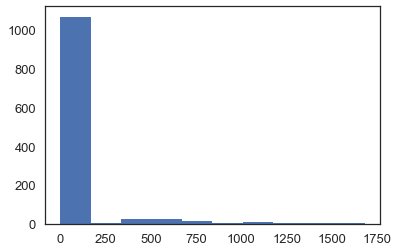

In [248]:
plt.hist(X_train.ravel())

In [249]:
y.shape

(178,)

0.9325842696629213


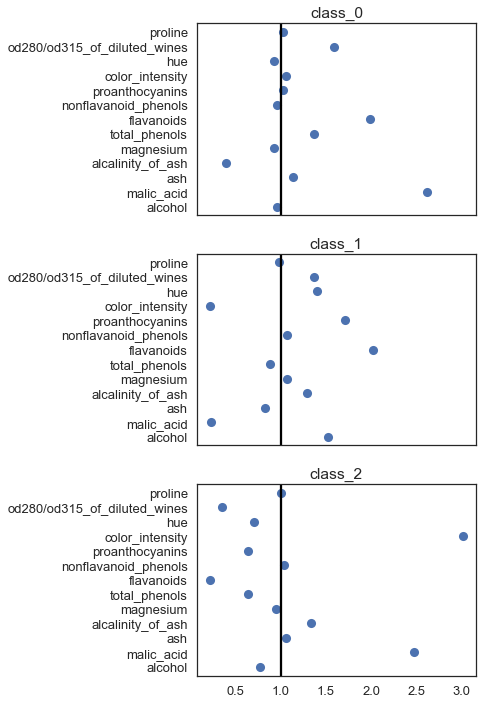

In [245]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

fig, axes = plt.subplots(3, 1, figsize=(5, 12), sharex=True)
for j, ax in enumerate(axes):
    ax.plot(np.exp(reg.coef_[j,:]), range(len(reg.coef_.T)), 'o')
    ax.axvline(1, color='k')
    ax.set_yticks(range(len(dataset.feature_names)))
    ax.set_yticklabels(dataset.feature_names)
    ax.set_title(dataset.target_names[j])

# Solutions

## Wine feature selection

In [ ]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

fig, axes = plt.subplots(3, 1, figsize=(5, 12), sharex=True)
for j, ax in enumerate(axes):
    ax.plot(np.exp(reg.coef_[j,:]), range(len(reg.coef_.T)), 'o')
    ax.axvline(1, color='k')
    ax.set_yticks(range(len(dataset.feature_names)))
    ax.set_yticklabels(dataset.feature_names)
    ax.set_title(dataset.target_names[j])

# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.6.1.
Dependencies listed in [environment.yml](../environment.yml), full versions in [environment_full.yml](../environment_full.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)